In [1]:
cd /home

/home


In [2]:
import tensorflow as tf 

import matplotlib.pyplot as plt 
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from presentation.pipelines.steps import load_pt_model, build_loader

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

2024-03-20 15:21:01.288926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path = './presentation/results/bugstromer_1/2024-02-01_13-54-17/pretraining/'

In [4]:
model, config = load_pt_model(path)

[INFO] Zero architecture loaded
[INFO] Using masked-att with alpha = 1.00
[INFO] Using masked-att with alpha = 1.00
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2024-03-20 15:21:03.473808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-20 15:21:03.473840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 99b123e2fc75
2024-03-20 15:21:03.473846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 99b123e2fc75
2024-03-20 15:21:03.473931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-03-20 15:21:03.473957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.104.5
2024-03-20 15:21:03.474274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions

[INFO] Using PE with c: 2.0
[INFO] Masking Query and Key tokens
[INFO] Masking Query and Key tokens


In [5]:
loader = build_loader('./data/records/macho/', config)

[INFO] Probed: 0.50 Random: 0.20 Same: 0.20
[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Zero
[INFO] Probed: 0.50 Random: 0.20 Same: 0.20
[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Zero
[INFO] Probed: 0.50 Random: 0.20 Same: 0.20
[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking
[INFO] Zero


In [6]:
for x,y in loader['test'].take(1):
    z, w, qkvalues, (q, k, v) = model.get_layer('encoder')(x, return_weights=True)
    q = tf.concat(tf.unstack(q, axis=1), axis=-1)
    k = tf.concat(tf.unstack(k, axis=1), axis=-1)
    v = tf.concat(tf.unstack(v, axis=1), axis=-1)

[INFO] Using PE with c: 2.0
[INFO] Masking Query and Key tokens
[INFO] Masking Query and Key tokens


In [7]:
def add_cbar(ax, fig, img):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    fig.colorbar(img, cax=cax, orientation='vertical')

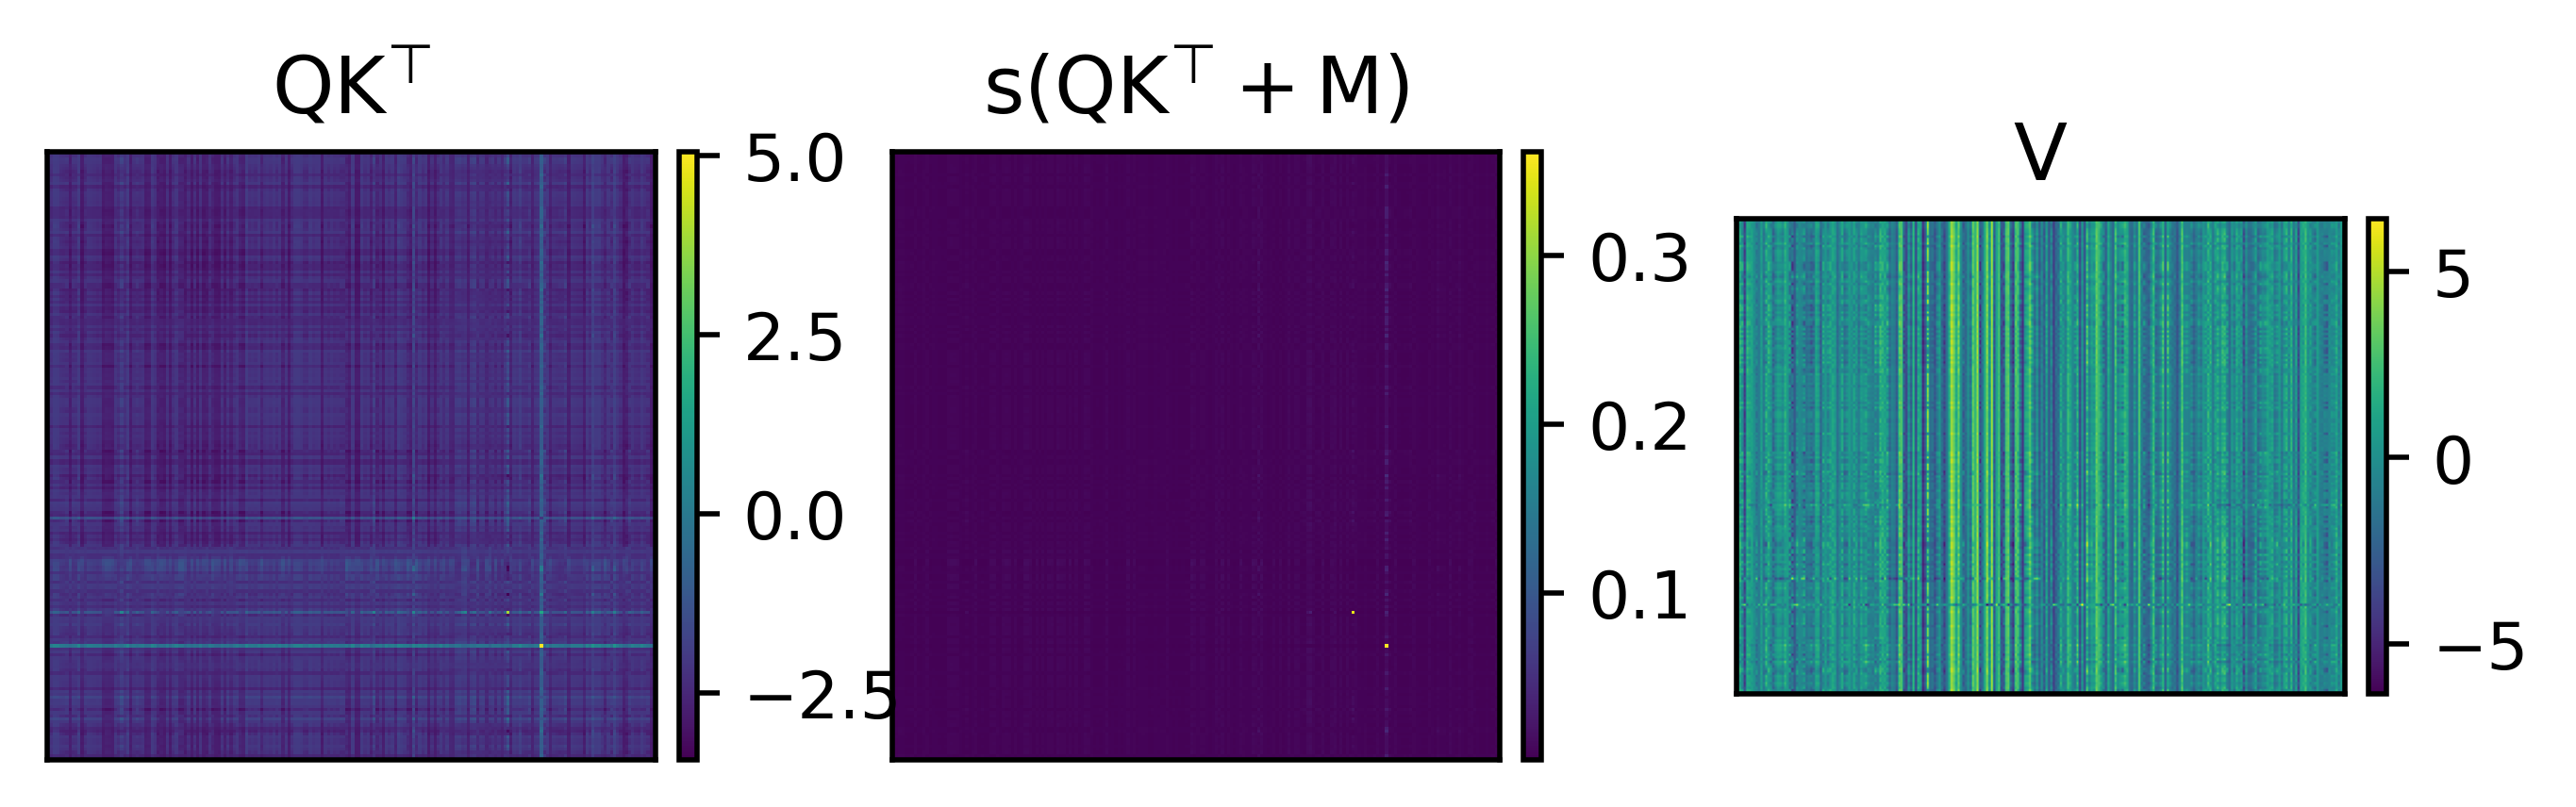

In [61]:
fig, axes = plt.subplots(1, 3, dpi=500, gridspec_kw={'wspace':0.3})
im0 = axes[0].imshow(qkvalues[0, 0])
axes[0].set_title(r'$\rm{QK^{\top}}$')
add_cbar(axes[0], fig, im0)

im1 = axes[1].imshow(w[0, 0])
axes[1].set_title(r'$\rm{s(QK^{\top}+M)}$')
add_cbar(axes[1], fig, im1)

im2 = axes[2].imshow(v[0])
axes[2].set_title(r'$\rm{V}$')
add_cbar(axes[2], fig, im2)

for i in range(3):
    axes[i].set_xticks([])
    axes[i].set_yticks([])

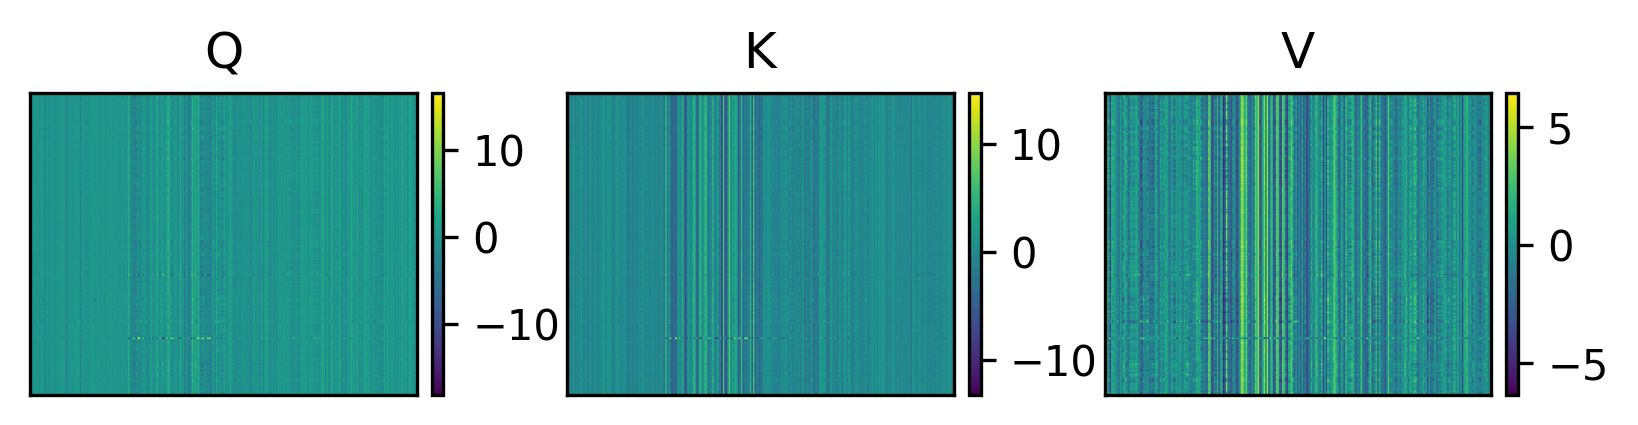

In [60]:
fig, axes = plt.subplots(1, 3, dpi=300, gridspec_kw={'wspace':0.3})
im0 = axes[0].imshow(q[0])
axes[0].set_title(r'$\rm{Q}$')
add_cbar(axes[0], fig, im0)

im1 = axes[1].imshow(k[0])
axes[1].set_title(r'$\rm{K}$')
add_cbar(axes[1], fig, im1)

im2 = axes[2].imshow(v[0])
axes[2].set_title(r'$\rm{V}$')
add_cbar(axes[2], fig, im2)

for i in range(3):
    axes[i].set_xticks([])
    axes[i].set_yticks([])

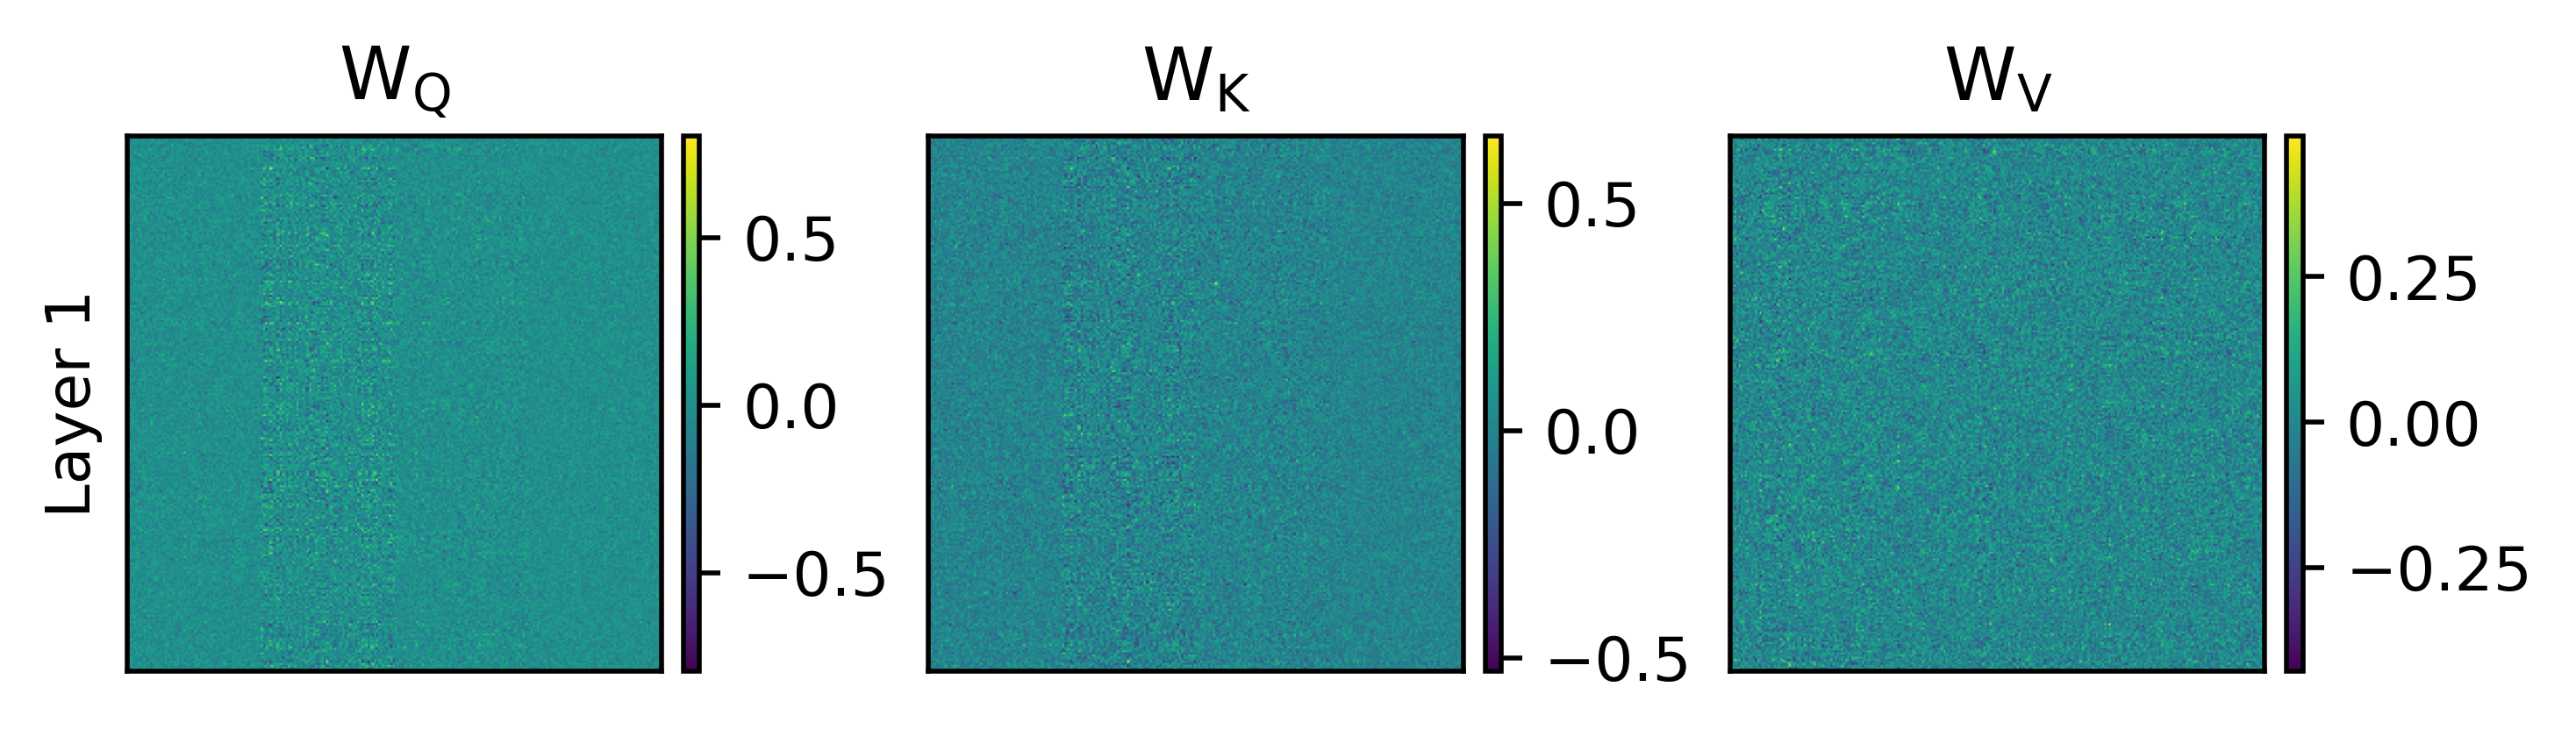

In [8]:
n_layer = 1
Wq = model.get_layer('encoder').enc_layers[n_layer].mha.wq.kernel
Wk = model.get_layer('encoder').enc_layers[n_layer].mha.wk.kernel
Wv = model.get_layer('encoder').enc_layers[n_layer].mha.wv.kernel

# -----------------------------------------------------------
fig, axes = plt.subplots(1, 3, dpi=500, gridspec_kw={'wspace':0.4})
im0 = axes[0].imshow(Wq)
axes[0].set_title(r'$\rm{W_Q}$')
add_cbar(axes[0], fig, im0)
axes[0].set_ylabel('Layer {}'.format(n_layer))

im1 = axes[1].imshow(Wk)
axes[1].set_title(r'$\rm{W_K}$')
add_cbar(axes[1], fig, im1)

im2 = axes[2].imshow(Wv)
axes[2].set_title(r'$\rm{W_V}$')
add_cbar(axes[2], fig, im2)

for i in range(3):
    axes[i].set_xticks([])
    axes[i].set_yticks([])